In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.signal import argrelextrema
import seaborn as sns

#YEARLY BETA DRAWDOWNS
spy = yf.download('spy',period = 'max')
def get_max_dd(nvs: pd.Series, window=None) -> float:
    """
    :param nvs: net value series
    :param window: lookback window, int or None
     if None, look back entire history
    """
    n = len(nvs)
    if window is None:
        window = n
    # rolling peak values
    peak_series = nvs.rolling(window=window, min_periods=1).max()
    return (nvs / peak_series - 1.0).min() *100
    
d = (spy['Adj Close']/spy['Adj Close'].rolling(window = 25, min_periods = 1).max() - 1)
years = np.arange(0,21) + 2000
drawdowns = []
for i in years:
    data = d.loc[str(i)]*100
    temp = data[data<-7]
    temp = temp.groupby(temp.index.month).max().tolist()
    drawdowns.append(temp)
#average drawdowns per year
dy =np.mean([len(i) for i in drawdowns])
dz = np.mean(np.mean([item for sublist in drawdowns for item in sublist]))
print("_________________________________")
print("{} drawdowns per year".format(round(dy,2)))
print("{} average draw down magnitued".format(round(dz,2)))


[*********************100%***********************]  1 of 1 completed
_________________________________
3.14 drawdowns per year
-7.57 average draw down magnitued


Optimal Risk Reward: 4.65
Minimum Break Even % of Profitable Trades: 0.1749636189276378


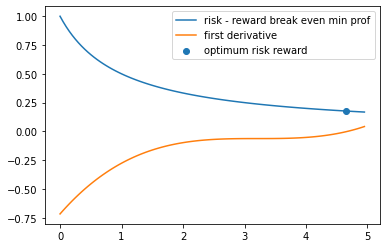

In [278]:
#OPTIMUM RISK REWARD RATIO BASED ON: 1/(1+R)
x = np.arange(0,5,.05)
y = [1/(1+i) for i in x]
fittedParameters = np.polyfit(x,y,4)
der = np.polyder(fittedParameters)
derp = np.polyval(der,np.arange(0,5,.05))
plt.plot(x,y,label = 'risk - reward break even min prof')
plt.plot(np.arange(0,5,.05),derp,label='first derivative')
optyloc = np.argmin(abs(derp))
optx = np.arange(0,5,.05)[optyloc]
opty = np.polyval(fittedParameters,optx)
plt.scatter(optx,opty, label = "optimum risk reward")
plt.legend()
print("Optimal Risk Reward: {}".format(optx))
print("Minimum Break Even % of Profitable Trades: {}".format(opty))


In [279]:
def kelly(winp,wina,lossa):
    peq = winp - ((1-winp)/(wina/lossa))
    return peq

profitablePerc = np.arange(.1,1,.01)
riskReward = np.arange(.1,5,.05)
kellyP = []
for i in profitablePerc:
    currentPerc = []
    for j in riskReward:
        currentPerc.append(kelly(i,j,1))
    kellyP.append(currentPerc)
kellyZ = pd.DataFrame(kellyP,columns = riskReward, index = profitablePerc).round(decimals = 2)

In [280]:
kellyZ.iloc[0:20]

,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,...,4.50,4.55,4.60,4.65,4.70,4.75,4.80,4.85,4.90,4.95
0.10,-8.90,-5.90,-4.40,-3.50,-2.90,-2.47,-2.15,-1.90,-1.70,-1.54,...,-0.10,-0.10,-0.10,-0.09,-0.09,-0.09,-0.09,-0.09,-0.08,-0.08
0.11,-8.79,-5.82,-4.34,-3.45,-2.86,-2.43,-2.11,-1.87,-1.67,-1.51,...,-0.09,-0.09,-0.08,-0.08,-0.08,-0.08,-0.08,-0.07,-0.07,-0.07
0.12,-8.68,-5.75,-4.28,-3.40,-2.81,-2.39,-2.08,-1.84,-1.64,-1.48,...,-0.08,-0.07,-0.07,-0.07,-0.07,-0.07,-0.06,-0.06,-0.06,-0.06
0.13,-8.57,-5.67,-4.22,-3.35,-2.77,-2.36,-2.04,-1.80,-1.61,-1.45,...,-0.06,-0.06,-0.06,-0.06,-0.06,-0.05,-0.05,-0.05,-0.05,-0.05
0.14,-8.46,-5.59,-4.16,-3.30,-2.73,-2.32,-2.01,-1.77,-1.58,-1.42,...,-0.05,-0.05,-0.05,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.03
0.15,-8.35,-5.52,-4.10,-3.25,-2.68,-2.28,-1.97,-1.74,-1.55,-1.40,...,-0.04,-0.04,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.02
0.16,-8.24,-5.44,-4.04,-3.20,-2.64,-2.24,-1.94,-1.71,-1.52,-1.37,...,-0.03,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01
0.17,-8.13,-5.36,-3.98,-3.15,-2.60,-2.20,-1.90,-1.67,-1.49,-1.34,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.00,0.00
0.18,-8.02,-5.29,-3.92,-3.10,-2.55,-2.16,-1.87,-1.64,-1.46,-1.31,...,-0.00,-0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01
0.19,-7.91,-5.21,-3.86,-3.05,-2.51,-2.12,-1.83,-1.61,-1.43,-1.28,...,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.03


# Kelly  Implies 2% Risk at a Risk-Reward Ratio of 4.65 (optimum)

# Half Kelly  Implies 1% at same Parameters as above

### Requires 1 in 5 Trades to be profitable 

### With 3 Draw Downs a Year of Greater than 7% implies of ( assuming each draw down results in all positions being held at  the time being liquidated),


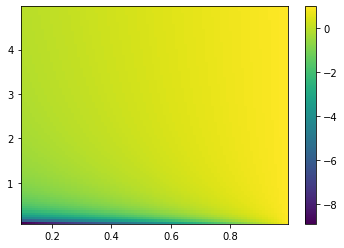

In [281]:
def conv_index_to_bins(index):
    assert index.is_monotonic_increasing or index.is_monotonic_decreasing

    # the beginning and end values are guessed from first and last two
    start = index[0] - (index[1]-index[0])/2
    end = index[-1] + (index[-1]-index[-2])/2

    # the middle values are the midpoints
    middle = pd.DataFrame({'m1': index[:-1], 'p1': index[1:]})
    middle = middle['m1'] + (middle['p1']-middle['m1'])/2

    if isinstance(index, pd.DatetimeIndex):
        idx = pd.DatetimeIndex(middle).union([start,end])
    elif isinstance(index, (pd.Float64Index,pd.RangeIndex,pd.Int64Index)):
        idx = pd.Float64Index(middle).union([start,end])
    else:
        print('Warning: guessing what to do with index type %s' % 
              type(index))
        idx = pd.Float64Index(middle).union([start,end])

    return idx.sort_values(ascending=index.is_monotonic_increasing)


def calc_df_mesh(df):
    """Calculate the two-dimensional bins to hold the index and 
    column values."""
    return np.meshgrid(conv_index_to_bins(df.index),
                       conv_index_to_bins(df.columns))
def heatmap(df):
    """Plot a heatmap of the dataframe values using the index and 
    columns"""
    fig = plt.figure()
    X,Y = calc_df_mesh(df)
    c = plt.pcolormesh(X, Y, df.values.T)
    plt.colorbar(c)
heatmap(kellyZ)


In [285]:
"""
Assuming 3 Draw Downs ~ 7% yearly
Risk Reward: 4.65 Risk Reward
Trade Time: 2-3 months
Trade Cycle: 4 - 6
How many Positions Open at 1 time?
"""
positionsOpened = np.arange(1,11)
cycles = 5
drawDowns = 3
rr = 4.65
#assuming risk of 600 or 1% 
kellyR = 600
p = .3
profit = []
#assuming the positions are sized based on 7% stop loss
for i in positionsOpened:
    betaLoss = 3*i*kellyR # High Volaility or DrawDown period 
    expectedValue = kellyR*rr*p - kellyR*(1-p) # Regular Trade Conditions
    yev = expectedValue*i*cycles
    pnl = yev-betaLoss
    profit.append(pnl)
    
    
    



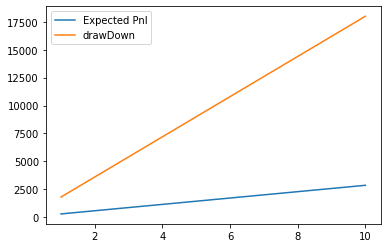

In [286]:
plt.plot(positionsOpened,profit, label = "Expected Pnl")
plt.plot(positionsOpened,[i*kellyR*3 for i in positionsOpened],label = "drawDown")
plt.legend()


Text(0.5, 1.0, 'Expected Draw Down Level')

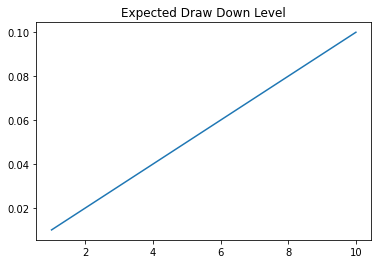

In [284]:
lp = [(i*kellyR/60000) for i in positionsOpened]
plt.plot(positionsOpened,lp)
plt.title("Expected Draw Down Level")


# Tolerable Draw Downs Less than 5% 

In [343]:
#risk-reward ratio & expected time to achieve reward
rt = [(1.5,.5),(2,1),(2.5,1.25),(3,1.75),(4,2),(5,2.5)]
allScenarios = []
p = .4
kellyR = 600
for i in rt:
    cycle = 12/i[1]
    profit = []
    for j in positionsOpened:
        betaLoss = 3*j*kellyR # High Volaility or DrawDown period 
        expectedValue = kellyR*i[0]*p - kellyR*(1-p) # Regular Trade Conditions
        yev = expectedValue*j*cycle
        pnl = yev-betaLoss
        profit.append(pnl)
    allScenarios.append(profit)
    

In [344]:
profitabilityScenarios = pd.DataFrame(allScenarios,columns = positionsOpened, index = [i[0] for i in rt])
profitabilityScenarios

,1,2,3,4,5,6,7,8,9,10
1.5,-1800.000000,-3600.000000,-5400.000000,-7200.000000,-9000.000000,-10800.000000,-12600.0,-14400.000000,-16200.000000,-18000.000000
2.0,-360.000000,-720.000000,-1080.000000,-1440.000000,-1800.000000,-2160.000000,-2520.0,-2880.000000,-3240.000000,-3600.000000
2.5,504.000000,1008.000000,1512.000000,2016.000000,2520.000000,3024.000000,3528.0,4032.000000,4536.000000,5040.000000
3.0,668.571429,1337.142857,2005.714286,2674.285714,3342.857143,4011.428571,4680.0,5348.571429,6017.142857,6685.714286
4.0,1800.000000,3600.000000,5400.000000,7200.000000,9000.000000,10800.000000,12600.0,14400.000000,16200.000000,18000.000000
5.0,2232.000000,4464.000000,6696.000000,8928.000000,11160.000000,13392.000000,15624.0,17856.000000,20088.000000,22320.000000


<AxesSubplot:title={'center':'Number of Positions Opened with probability: 0.4'}, xlabel='Risk-Reward Ratio', ylabel='Profit'>

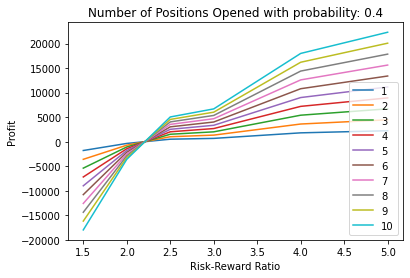

In [345]:
profitabilityScenarios.plot(xlabel = 'Risk-Reward Ratio', ylabel = 'Profit',title = "Number of Positions Opened with probability: {}".format(p))

# Risk Reward Ratio of 4 (close to theoretical 4.65) works accross different levels of P (probability of profitable trade)